In [1]:
# Importing libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

## Section 2: Data Loading

###2.1.- Mounting data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###2.2.- Loading data.

In [3]:
data_path = '/content/drive/MyDrive/Data Science/Colab Notebooks/Data/Data Science Fundamentals/sales_predictions.csv'
df = pd.read_csv(data_path)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Section 3: Data Dictionary

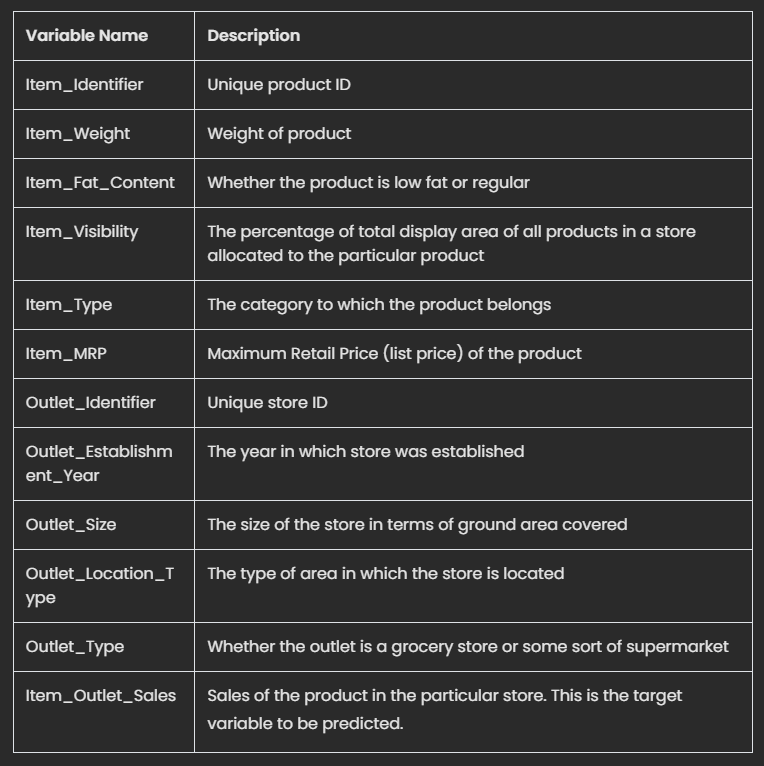

##Section 4: Data Understanding

###4.1.- Primary look.

In [4]:
# Let's see the general information of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Let's display the size of our dataframe.
df.shape

(8523, 12)

In [6]:
# Let's display a full statistical summary.
df.describe(include='all').round(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.00,8523,8523.00,8523,8523.00,8523,8523.00,6113,8523,8523,8523.00
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.86,NaN,0.07,NaN,140.99,NaN,1997.83,NaN,NaN,NaN,2181.29
std,NaN,4.64,NaN,0.05,NaN,62.28,NaN,8.37,NaN,NaN,NaN,1706.50
min,NaN,4.56,NaN,0.00,NaN,31.29,NaN,1985.00,NaN,NaN,NaN,33.29
25%,NaN,8.77,NaN,0.03,NaN,93.83,NaN,1987.00,NaN,NaN,NaN,834.25
50%,NaN,12.60,NaN,0.05,NaN,143.01,NaN,1999.00,NaN,NaN,NaN,1794.33
75%,NaN,16.85,NaN,0.09,NaN,185.64,NaN,2004.00,NaN,NaN,NaN,3101.30


*Notes:*
1. Looks like we have missing data on 'Item_Weight' and 'Outlet_Size'.
2. Until now, we don't identify any discrepancy with dtypes.

###4.2.- Identify duplicate values.

In [7]:
# Let's see how many duplicate rows we have in our data.
df.duplicated().sum()

0

###4.3.- Identify missing data.

In [8]:
# Let's see how many values are missing.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Calculating the impact of missing data.

# Item Weight
miss_weight_data = round((1463 / 8523 * 100),2)

print(f"The missing data from 'Item_Weight' represents", miss_weight_data, "%.")

# Item Size
miss_size_data = round((2410 / 8523 * 100),2)
print(f"The {miss_size_data}% of the data is missing from column Outlet_Size.")

The missing data from 'Item_Weight' represents 17.17 %.
The 28.28% of the data is missing from column Outlet_Size.


*Notes:*
- Our job is to predict how the sales will be in 2023, so the weight of the product is not a variable that will influence the sales. For that reason, we decided to drop the rows with this issue.
- Missing data will be handled in **Section 5**.

###4.4.- Identify inconsistencies in categorial values.

In [10]:
# Now, let's have a quick look about any inconsistent category in our dataframe.
dtypes = df.dtypes
obj_columns = dtypes[dtypes == 'object'].index
obj_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [11]:
# Now we can use a 'for loop' mixed with value_counts() method to bring all the columns and detect inconsistencies in one block.
for col in obj_columns:
  print(f'\033[1m - Column - \033[0;0m {col}')
  print(df[col].value_counts(dropna=False))
  print('\n\n')

 - Column -  Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



 - Column -  Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



 - Column -  Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



 - Column -  Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930

*Notes:*
- Colum 'Item_Fat_Content' has 3 categories for low fat (Low Fat, LF, anf low fat).
- This issue will be addressed in **Section 5**.

###4.5.- Identify outliers.

In [12]:
# Let's generate statistical summary.
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


*Notes:*
- It doesn't look that there is not outliers in our data. Let's confirm that with boxplots.
- Because each variable has a different scale, it's recommended to graph each one separate.

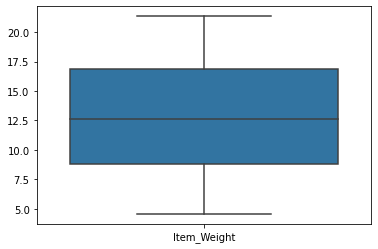

In [13]:
# Boxplot for 'Item_Weight' using Seaborn.
sns.boxplot(data=df.loc[:, ['Item_Weight']]);

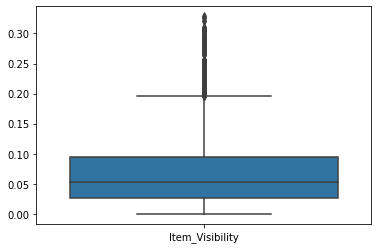

In [14]:
# Boxplot for 'Item_Visibility' using Seaborn.
sns.boxplot(data=df.loc[:, ['Item_Visibility']]);

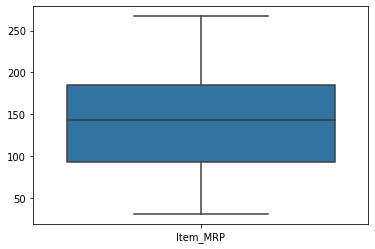

In [15]:
# Boxplot for 'Item_MRP' using Seaborn.
sns.boxplot(data=df.loc[:, ['Item_MRP']]);

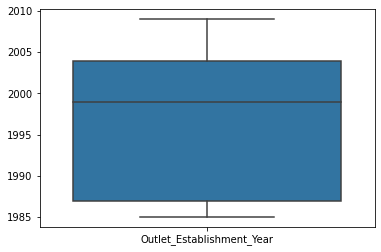

In [16]:
# Boxplot for 'Outlet_Establishment_Year' using Seaborn.
sns.boxplot(data=df.loc[:, ['Outlet_Establishment_Year']]);

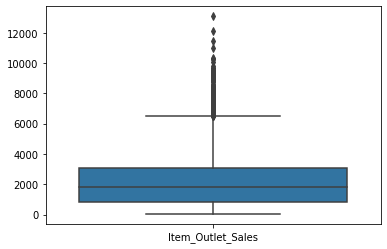

In [17]:
# Boxplot for'Item_Outlet_Sales' using Seaborn.
sns.boxplot(data=df.loc[:, ['Item_Outlet_Sales']]);

*Notes:*
- As the plots shows, we identified outliers on 'Item_Visibility' and 'Item_Outlet_Sales' variables.
 - About 'Item_Visibility', a high percentage of visibility is a factor that the Management should determine if it affects the profit. From our perspective, high value does not affect sales in a negative way.
 - For 'Item_Outlet_Sales', more sales it's better.
- Both columns will remain the same in our dataframe.

##Section 5: Data preparation for Machine Learning

In context (as was reported on last stack - Data Science Fundamentals):

- We have three variables that we consider that would affect the sales volume (Variables Type A):
 - Item_Visibility.
 - Item_Type.
 - Item_MRP.
- We identified three variables that could affect the sales behavior (Variables Type B):
 - Outlet_Size.
 - Outlet_Location_Type.
 - Outlet_Type.

- We are going to work with the variables described above to compare their relationship with Item_Outlet_Sales.

For our Machine Learning model:
- Target (y):
 - Item_Outlet_Sales.
- Features (X):
 - Numerical:
   - Item_Visibility.
   - Item_MRP.
 - Categorical:
   - Item_Type.
   - Outlet_Size.
   - Outlet_Location_Type.
   - Outlet_Type.

*Notes:*
- Since we don't have missing data on Target ('Item_Outlet_Sales') we are going to split the data, then the cleaning using imputer transformers with ColumnTransformer.
- Before moving forward, let's calculate the correlation between features in order to plot a Heatmap.

In [18]:
# Calculating the correlation.
corr = df.corr()
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


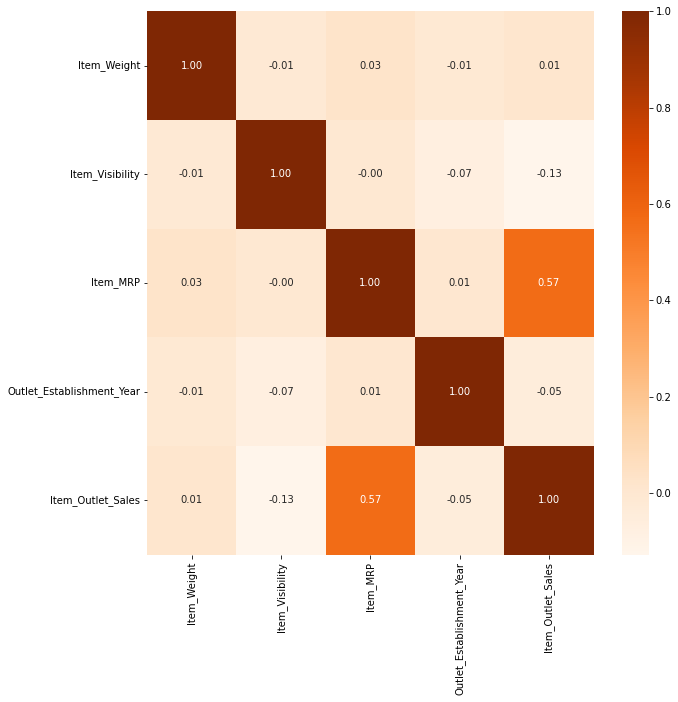

In [19]:
# Let's plot our heatmap.
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Oranges', annot=True, fmt='.2f');

*Notes:*
- As was displayed, we identified a moderate correlation between our target and 'Item MRP'.
- This insight could cause noise in our regression models (Section 6 and 7), especially for the weak correlation between the target and 'Item Visibility'. 

###5.1.- Train & Test split data

In [20]:
# Define Target (y).
y = df['Item_Outlet_Sales']
y.head()


0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [21]:
# Define Features (X).
X = df.drop(columns=['Item_Identifier', 'Item_Weight',
                        'Item_Fat_Content', 'Outlet_Identifier',
                        'Outlet_Establishment_Year',
                        'Item_Outlet_Sales'], axis=1)
X.head()

,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1
3,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store
4,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1


In [22]:
# Train & Test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# Instantiate the selectors.
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [24]:
# Instantiate the transformers.
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [25]:
# Instantiate One Hot Encoder.
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [26]:
# Instantiate Scaler.
scaler = StandardScaler()

###5.2.- Pipelines and Column Transformer

In [27]:
# Instantiate numeric pipeline.
num_pipeline = make_pipeline(mean_imputer, scaler)
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [28]:
# Instantiate categorical pipeline.
cat_pipeline = make_pipeline(freq_imputer, ohe)
cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [29]:
# Tuples for Column Transformer.
num_tuple = (num_pipeline, num_selector)
cat_tuple = (cat_pipeline, cat_selector)

In [30]:
# Instantiate Column Transformer.
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f24315f4eb0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f243153d0d0>)])

In [31]:
# Fit Column Transformer on train (X).
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f24315f4eb0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f243153d0d0>)])

###5.3.- Transform Train & Test data

In [32]:
# Transform train and test data.
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [33]:
# Display the result.
print(np.isnan(X_train_processed).sum().sum(), 'missing value in our training data.')
print(np.isnan(X_test_processed).sum().sum(), 'missing data in our test data. \n')
print('All data in our X_train_processed are', X_train_processed.dtype)
print('All data in our X_test_processed are', X_test_processed.dtype,'\n')
print('The shape of our data is', X_train_processed.shape, '\n')
print('Our Numpy Array is \n')
X_train_processed

0 missing value in our training data.
0 missing data in our test data. 

All data in our X_train_processed are float64
All data in our X_test_processed are float64 

The shape of our data is (6392, 28) 

Our Numpy Array is 



array([[-0.71277507,  1.82810922,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.29105225,  0.60336888,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81331864,  0.24454056,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.92052713,  1.52302674,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.2277552 , -0.38377708,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.95867683, -0.73836105,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

##Section 6: Linear Regression

###6.1.- Build a linear regression model to predict sales.



In [34]:
# Instantiate our model.
lin_reg = LinearRegression()

In [35]:
# Create pipeline
lin_reg_pipe = make_pipeline(scaler, lin_reg)
lin_reg_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [36]:
# Fit pipeline
lin_reg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [37]:
# Create model predictions
train_pred = lin_reg_pipe.predict(X_train_processed)
test_pred = lin_reg_pipe.predict(X_test_processed)

###6.2.- Evaluate our linear regression model

In [38]:
# Calculating R^2 using Scikit-Learn.
train_r2 = r2_score(y_train, train_pred).round(4)
test_r2 = r2_score(y_test, test_pred).round(4)

print(f'Model Training R^2: {train_r2}')
print(f'Model Test R^2: {test_r2}')
print('\nYes, we identified the difference between both models.')

Model Training R^2: 0.5603
Model Test R^2: 0.5662

Yes, we identified the difference between both models.


In [39]:
# Calculating MSE using Scikit-Learn.
train_MSE = mean_squared_error(y_train, train_pred).round(4)
test_MSE = mean_squared_error(y_test, test_pred).round(4)

print(f'Model Training MSE: {train_MSE}')
print(f'Model Test MSE: {test_MSE}')

Model Training MSE: 1301143.2426
Model Test MSE: 1196805.6205


In [40]:
# Calculating RMSE using Scikit-Learn.
train_RMSE = np.sqrt(train_MSE).round(4)
test_RMSE = np.sqrt(test_MSE).round(4)

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Test RMSE: {test_RMSE}')

Model Training RMSE: 1140.6767
Model Test RMSE: 1093.9861


*Notes:*
- Having a R^2 values around 0.56 means that ~56% of the variance in the outcome variable is explained by our model.
- Having a RMSE in our training model higher than test model is an indication of overfitting. It's not a big difference between both, but it's important to keep this in mind.

##Section 7: Regression Tree
- For this regression we have choosen Random Forests model.

###7.1.- Build a Random Forests model to predict sales.



In [41]:
# Instantiate our model.
rf = RandomForestRegressor(random_state = 42)

In [42]:
# Fit our model.
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Predict the values for y.
rf.predict(X_test_processed)

array([ 720.149254,  806.41696 ,  622.030308, ..., 4558.705968,
       2147.824194, 2302.849066])

In [44]:
rf.predict(X_train_processed)

array([1800.443044, 3066.721406, 2013.439122, ..., 5308.85617 ,
       1530.587646, 1083.170046])

###7.2.- Evaluate our Random Forests model

In [45]:
# Let's create a function to take the true and predicted labels and print MAE, MSE, RMSE, and R2 metrics.
def evaluate_regression(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'MSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR^2: {r2:.2f}')

In [46]:
# Let's call 'evaluate_regression' function to display MSE, RMSE, and R2.
print('\033[1mMetrics from training set:\033[0;0m')
evaluate_regression(y_train, rf.predict(X_train_processed))
print('\n\033[1mMetrics from testing set:\033[0;0m')
evaluate_regression(y_test, rf.predict(X_test_processed))

Metrics from training set:
MSE: 185,754.36 
RMSE: 430.99 
R^2: 0.94

Metrics from testing set:
MSE: 1,222,180.38 
RMSE: 1,105.52 
R^2: 0.56


*Notes:*
- Having a R^2 in training set higher than test model is another indication of overfitting (High Variance).
- This model has higher R^2 in our training set, so this one is higher capable to explain more percentage of the variance of data.

###7.3.- Tune our Random Forest model
- The idea about this tuning, is looking for improve our metrics.

In [47]:
# Looking at some hyperparameters that seem tunable.
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [48]:
# Tuning the Max Depth.

# Let's see what the depth of each tree in our random forest is when the Max Depth is unlimited.
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

44

In [49]:
# Finding the optimal max_depth (hyperparameter tuning).

# List of values to try for Max Depth.
depths_forest = range(1, max(est_depths))
scores_forest = pd.DataFrame(index=depths_forest, columns=['Test Score'])

In [50]:
# Let's create our loop.
for depth in depths_forest:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train_processed, y_train)
   scores_forest.loc[depth, 'Train Score'] = model.score(X_train_processed, y_train)
   scores_forest.loc[depth, 'Test Score'] = model.score(X_test_processed, y_test)

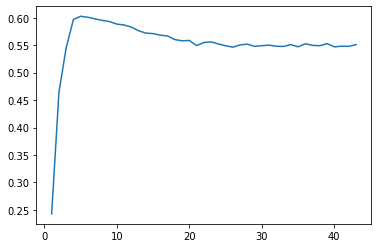

In [51]:
# Let's plot the scores.
plt.plot(scores_forest['Test Score']);

In [52]:
# Let's check by sorting our dataframe to find the depth for the best score.
sorted_forest = scores_forest.sort_values(by='Test Score', ascending=False)
sorted_forest

,Test Score,Train Score
5,0.602779,0.610367
6,0.600855,0.623665
7,0.597917,0.641287
4,0.596835,0.595590
8,0.595232,0.662809
9,0.593017,0.688016
10,0.588431,0.716327
11,0.586833,0.742824
12,0.582966,0.774812
13,0.576319,0.799759


In [53]:
# Let's see if we can improve our score by tuning the number of estimators, finding the optimal Max Depth (hyperparameter tuning).

# List of estimator values.
n_ests = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]

In [54]:
# Dataframe to store the scores.
scores_forest1 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])

In [55]:
# Let's create our loop.
for n in n_ests:
   model = RandomForestRegressor(max_depth=max(est_depths), n_estimators=n)
   model.fit(X_train_processed, y_train)
   scores_forest1.loc[n, 'Train Score'] = model.score(X_train_processed, y_train)
   scores_forest1.loc[n, 'Test Score'] = model.score(X_test_processed, y_test)

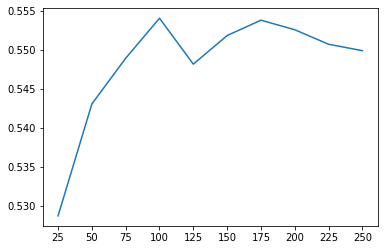

In [56]:
# Let's plot the results.
plt.plot(scores_forest1['Test Score'])
plt.xticks(n_ests);

In [57]:
# Let's sort the scores dataframe by 'Test Score'.
sorted_scores_forest1 = scores_forest1.sort_values(by='Test Score', ascending=False)
sorted_scores_forest1

,Test Score,Train Score
100,0.554067,0.936835
175,0.553817,0.938646
200,0.552591,0.938261
150,0.551847,0.938096
225,0.55073,0.93836
250,0.549904,0.938344
75,0.548933,0.936497
125,0.548178,0.938326
50,0.543064,0.93454
25,0.528701,0.930981


In [58]:
# Let's run the model with our optimized value for Max Depth.
forest_tree_250 = RandomForestRegressor(max_depth=250, random_state=42)
forest_tree_250.fit(X_train_processed, y_train)
train_250_score_forest = forest_tree_250.score(X_train_processed, y_train)
test_250_score_forest = forest_tree_250.score(X_test_processed, y_test)
print(train_250_score_forest.round(2))
print(test_250_score_forest.round(2))

0.94
0.56


In [59]:
# Let's call again 'evaluate_regression' function to to compare the results.
print('\033[1mMetrics from training set:\033[0;0m')
evaluate_regression(y_train, rf.predict(X_train_processed))
print('\n\033[1mMetrics from testing set:\033[0;0m')
evaluate_regression(y_test, rf.predict(X_test_processed))

Metrics from training set:
MSE: 185,754.36 
RMSE: 430.99 
R^2: 0.94

Metrics from testing set:
MSE: 1,222,180.38 
RMSE: 1,105.52 
R^2: 0.56


*Notes:*
- After tuning the model we didn't improve our model.

##Section 8: Conclusions

- Let's display a summary table to display the results:

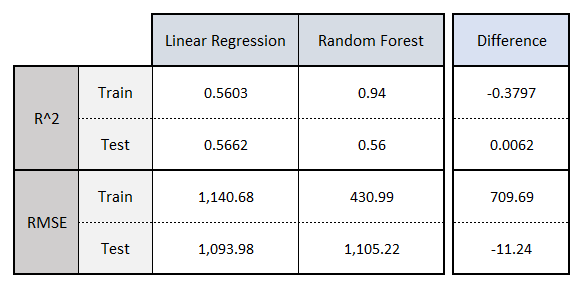

- According to this, our Random Forest model is more able to explain how much variance we have, but both models could predict about 56% of the sales.
- About RMSE, the train set from our second model indicates less difference which is good.
- For those reasons, we recommend considering the Random Forest model.